Implementation of backus gilbert method

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp

In [3]:
mp.dps = 100
mp.pretty = True
print(mp.exp(1.0), np.exp(1.0))

2.718281828459045235360287471352662497757247093699959574966967627724076630353547594571382178525166427 2.718281828459045


(30,)
(30, 1000)


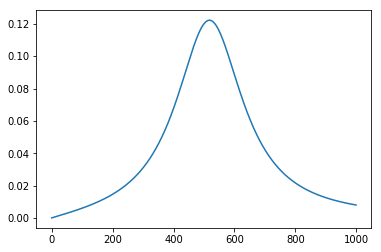

In [42]:
#setup
Nmu=30;
Nt=Nmu;
Nw=1000;

mumin=0;
mumax=10;
dmu=(mumax-mumin)/Nmu

wmin=0.001;
wmax=6.;
dw=(wmax-wmin)/Nw;

Frequencies = np.array([wmin+dw*w for w in range(Nw)])


mockrho = [0.1]*Nw

for j in range(Nw):
    mockrho[j]=Frequencies[j]/((Frequencies[j]**2-3**2)**2+5**2)

Kernel=np.array([[  (1./2. if w == 0 or w== Nw-1 else 1.) *
                     dw*mp.exp(-(wmin+dw*w)*t) 
                  for w in range(Nw) ] for t in range(1,Nt+1)]);



DataIdeal = np.dot(Kernel,mockrho)

print(DataIdeal.shape)
print(Kernel.shape)
#plt.yscale('log')
#plt.plot(DataIdeal)
plt.plot(mockrho)

In [43]:
NoisyData = [0]*Nmu

#standard deviation scaling
K=1e-3
Nmeas =1000

for i in range(Nmu):
    NoisyData[i]=(np.random.normal(loc=DataIdeal[i],scale=DataIdeal[i]*K*np.sqrt(Nmeas)**2,size=Nmeas))
    
#print(NoisyData)


In [44]:
DataAverage = [0]*len(NoisyData)
Variance= [0]*len(NoisyData)

for j in range(len(NoisyData)):
    DataAverage[j]=np.mean(NoisyData[j])
    #Variance[j] = np.var(NoisyData[j])
    
print(DataAverage)


[0.017494393427470525, 0.0031995126577892517, 0.0012275181154884044, 0.0006420206452811952, 0.0003929169901482079, 0.00027158688799650677, 0.0002015127056623773, 0.00014537819915513684, 0.00011179517482007405, 9.75625657268848e-05, 7.326155601456676e-05, 6.990110356118601e-05, 5.768685475699318e-05, 4.587953586950631e-05, 4.4383616245024585e-05, 3.635321373422684e-05, 3.609245823969341e-05, 3.077090882266407e-05, 2.6956636686683353e-05, 2.394555999248274e-05, 2.141852511888083e-05, 1.9449011065254263e-05, 1.7742022115783665e-05, 1.659766455262393e-05, 1.6141773077812442e-05, 1.4021368522859806e-05, 1.325606629469057e-05, 1.1369229536812069e-05, 1.0670838843236005e-05, 1.0521248057605604e-05]


In [45]:
AutoCorrelationCorr=1.; 

#standard covariance expression, why (Nmeas-1.)*Nmeas?
DataCovarianceMatrix=AutoCorrelationCorr*np.array([[ sum( np.array([ ( NoisyData[i][n]-DataAverage[i] )*
                                     ( NoisyData[j][n]-DataAverage[j] )/((Nmeas-1.)*Nmeas) for n in range(Nmeas)]) )
                  for i in range(Nmu) ] for j in range(Nmu)]);
print(DataCovarianceMatrix.shape)
print(DataCovarianceMatrix)

(30, 30)
[[ 3.06385243e-07 -1.08009606e-09  6.24266500e-10 -1.73783806e-10
  -1.77616957e-10 -1.50439802e-11  1.38251101e-10 -8.30163597e-11
   2.82048678e-11 -4.12927685e-11 -1.91923654e-11  2.36107187e-11
  -3.09741303e-12 -1.01904923e-11 -2.74615722e-11 -9.36187191e-12
  -1.77453137e-11 -4.14172533e-11  1.81398480e-11  7.01068277e-12
  -9.39089421e-12 -7.93991002e-12 -2.65599046e-12  9.03962804e-12
  -1.29816829e-11 -5.79922544e-12  4.91740831e-12  8.25884178e-12
  -9.51774166e-12 -5.67770832e-12]
 [-1.08009606e-09  1.11317499e-08 -9.81923323e-11  5.90599289e-11
   1.71656052e-11  4.11957137e-13  3.18550727e-11 -1.76207798e-11
  -3.07217361e-12 -5.74036572e-12 -5.54000451e-12 -7.58297478e-13
   8.99698144e-12 -1.38317078e-12 -1.98764579e-12  3.91581330e-12
   1.20567857e-12  1.06766516e-12  4.48253783e-12  2.37100066e-12
   3.30704667e-12 -2.83930714e-12 -1.70542206e-12  4.65961236e-13
   3.51430800e-13  6.44866151e-13 -3.69478073e-13  6.96850255e-13
   1.65004129e-12  2.81612626e-1

In [27]:
R1=mp.matrix(Kernel)*mp.ones(1,Nw).T
S = DataCovarianceMatrix

In [46]:
RM=np.array([[  np.exp(-(wmin+dw*w)*t) 
                  for w in range(Nw) ] for t in range(1,Nt+1)]);

R = np.array([sum(RM[i,j]*(0.5 if j==0 or j==Nw-1 else 1.) for j in range(Nw)) for i in range(Nmu)])*dw
S = DataCovarianceMatrix

In [20]:
#antiderivative of "spread matrix"
def intW(i,j,w,x):
    return mp.exp(-x*(i+j)) * (-2 + 2*j*(w-x) - i**2*(w-x)**2 - j**2*(w-x)**2 - 2*i*(-w+x)*(1+j*(-w+x))) / (i+j)**3
   

In [58]:
W = np.empty((Nt,Nt))
u1 = np.empty(Nw)
u2 = np.empty(Nw)

for x in range(Nw):
   
    if(x%10 == 0): 
        print(x)
        for i in range(len(y1)): print(y2[i]/y1[i])
    wcurrent = wmin+dw*x
    
    #Computing spread matrix
    for i in range(Nt):
        for j in range(Nt):
            W[i,j]=0
            if(i > j):
                W[i,j] = W[j,i]
            else:
                W[i,j] = intW(i+1,j+1, wcurrent, wmax) - intW(i+1,j+1, wcurrent, wmin)
            
    
    y1 = mp.lu_solve(W+1.0*S,R)
    y2 = np.linalg.solve(W+1.0*S,R)
    
    
    
    a = (mp.matrix(DataAverage).T*y1)[0]
    b = (mp.matrix(R).T*y1)[0]
    u1[x] = mp.fdiv(a,b)
    u2[x] = (DataAverage@y2)/(R@y2)
    
    


0
1.000000133689073946537192325399524219179398020243468676358243725482186609947179934060282213243967023
1.000000203460879484586581715449930164774635468756921881727508711264471072547526311419215970484372159
1.00000025833288973316879954163006039708781395423005288210644388213790438723570862225110891522691874
1.000000305851360005845678987986502544192618339552614836172987248023748724677833464204488737434096559
1.000000625912152360333184789671616883792809382804226028969226602526713799478685932668942731857189205
0.9999990731098745515523440956027412833627126842954562693472662256791673133569734427635398063230165418
0.9999885710068140051219762844010467710482528284028468692079028900283623684904994414566170675205435967
1.000003990710336227723436508133544139883093952845003852006676567779470265663589274442810557334128977
0.9999963781660087800016603083946529617990979291085182219683629736553956943170298415710103137324384007
1.0000069042897923203130087927537593249230290534821072750351120628823182919876

30
1.000000032631186757194019509910163195572538392367022455686468532338000088857305880690262393651462646
1.000000526622435138193243521338958297323049792730925840020559866877195776331226179542342831225896396
0.9999997626579687654422535111969170077313970488196335696076223636023062045687745264234927224809085051
0.999999870974975930738340535980668155812631633212163782989227389513322810087873493222330706111212256
0.9999998982181473629956961801144366301241553431857512622246745078888314582017235202874730652400317452
1.000000191639867454292978477457153500795291920604088867771934140329461853557993923125166819895681284
1.00000001702286290071020534083867998191266925380029734935466347904767234963889037829227955286925985
0.9999998913909005711688771557603540840147338084812522674343268587768298888722596364252481697096126679
1.000000153796767408014769864505639862987292042097297779619710930252573316945137191750752576148136876
0.999999891751510286868891451947333331508281101986504577679674074595243133717

60
0.9999971804066651117185094071783816420944168928546567669505633660204605886259772877770186718994858563
0.9999993857483116368101960174700093253373660346981019333142829637029564844973519932030733576565973936
0.9999994281699248662205590259313863526906665310193847380963320485364253367530585618241800402465744417
0.9999993094581825889853438407348834641887989146319655855847255563921017206510144110604605960873797674
0.9999997418191569571030081834860853479034970254459327081442378912081313003862906799386595484013101774
0.9999994952071215530792887630524581224920143578413836469227729907301843675584026169101486615420693063
0.9999998041189097541204121264067985230959484940812487586924255240589604079189938736083457960399725781
0.9999990245935558666531860031306034658524341987204240076189966810503168025683775456252548259902260357
0.9999997561048749285836093800607186249473359145108791574522506239962065283660341831224230699157552453
0.99999977668842492993337301826464873511858762230473429117370274045412

90
0.9999998544963202298208598384844067430935662547711694142824606828923439669355863888851913472178944181
0.9999997531295094269339922473566883344568589471039608879365445381779131807480747670658854826493754885
0.9999996702835750994206647800483448239924685004469462082239733477592360136043598123037832003373502906
0.9999993575403012866646021794180915311849626029487559072468902503885609717412563880060357332064086719
1.000000586869099103360991456710917979206219276261455772079168775960334041106500198612901010175364906
1.000000278640193372817783444478805555982873105191551540766790522283446712678079603799309163840711178
0.9999994897820544151732213678907097464732208853692049618469418936224280594270562361715940444156699466
1.000001629223121510545516344122373231693867096844565158849615304877528104361945598956246110879619093
0.9999993555335603798528551593752897006914417816624747315061144984026216317471473378176447248663443587
0.99999850655008187163494001988450333637392963223411725622557295521510796

120
0.9999973288650516193331966791969622936328921414801554136331757189522211082804881878176882215495275657
0.9999995827186596299911171064907790760756564675966978481078549561657595310126333430849410210110524873
0.9999994840501860727658835824505992219024962276485216191470962892335051569469635594521990811617671962
0.9999993827050578459048459300898398440321922626355185302391141069750456066012105923180679597772300899
0.9999989115449110992891365825970370619134601501710040254550360441203866954104817602314680936348842448
1.000014176108881880212217930748993543881322475259838689988286851462857947062376074732698902503599285
1.000000217325368460499733201756938016823957423594175280990019633821376693428068365467322390338714685
1.000000888014048060212976580743866068370236165952266235382597042348222553909050057011818120462316634
0.9999969656945608037675897060360618769688633473674849099986622728299910707999439868495062434130442812
0.9999998014036977804134101985097578628087218677785543187816374693004700

150
0.9999761358919338351458826925988907280601148328134748150542991403642560881022429630407629842515341297
1.000000617711352772588432390641181959805974513489794787926208245376366376279893032319802086109533717
1.000000440464588194338056382662145511688963537643195435982410848981251299572245460895946601521499067
1.000000277504926676480546423125594586114261599907103495955615199035777057653534027499424697856096561
0.9999990094277049800722022517856814881402653315713632532427333350100250495849937215692190964371932728
1.000000773738991261940652797755912478955130869927701811476503287049590626876206057392623422654827551
1.000000287656734057717326993810278469257499589282429796968851264743887286397660615752659487220865957
1.000000243462688797802770457786039275248030952213240464278817038416773930676502147676761821710313761
1.000000089282495000967079788045208273467226927218570962943160346512087631012284905115399168832763347
1.00000497591079679378194827147656452965456484666537760598302616300788804782

180
0.9999999300743013174058928606773938262481095418832480654190353240424284734391059428868281152654737697
0.9999999078681640043649348809410161751208555048146585565077684338973492259690851345467353932500677151
1.000000070286171624424393744212237420822630220114588816240701316153330822363744362733861306934603846
0.9999997179982275708616882714344342028443134305623256847317928985491285156512725427785597026306930367
0.9999995040882050191283464701985452245466150742155876808243305621182981955513938522481128373240269102
1.000001690220005191979187724127015411819164414416317952604550241263878760002144442631201810702854382
1.000000833579077045533241989118818401406710305096916615364250412802025311573550943689934297833466428
0.999998458458113133261448536145217982220616077304628523397114715619218350212481430073524980276140316
1.000005206431421582401131830524163201492373007725121555181333717481445124011280679376143537461571058
0.999997811246691879967667596984471628592525679941181239163525248048242742

210
1.000000275142942887029782442551722743745584416371217013165636197719625996878575905325691274982597215
1.000000335125170122540245079637780885577529830866495254128686135153970112287702183755598760290322816
1.000000298044961803437111102159572542291035851836262416488068281998286357731954294136787213248942443
1.000000268693052748398151701654711186265035540845912899787298660830649115174067945122144812039941466
1.000000967976323296868195017284620558550337372125020802109191529181701884221641101242676352088528068
1.000001079000935256229336518405275983657846717691920184398850667487608975088375810528593866589737699
1.000000050200069429328594080370259452967200745335039142872506087298531811626138622727204529609010047
1.00000239275661454505674008192660021147137804644882392134201991657057723652432516441635055669411537
0.9999991454398454417374336109925720659973346856924453983586701725302319526468393917414820509682156222
1.0000007843720132340309494772274419442049523570957364441507833589245958291498

240
0.9999996470998805112800028361703202036987968028063005725934174831977462502512318888599134654218799042
0.9999994163120267305315233844966164447539603618313255343427230371015292395090062455501146250756024816
0.9999995649198330336303279756955296039294766671113762344159337106978092842384301426455253324316605089
0.9999995466349232520991811511578507138352542826549462995519332736658731395100364677091502599054301362
0.9999990747531175353608489241103137420827809431959443732362874885522040764863516660666469117859857963
1.000000619667891053924965332337700108462897610999279943919831290285164297531332045705608803795608606
0.9999649498831570195166911644498514196359363166819003145212775191387385476649053613263136306127526951
0.9999989722730966194410726784813726801061491092078386786398291852696813624329748093964836695746147152
0.9999976156847099472183575611318979589881913721541866451383683213858750966934875263939730420217107819
0.99997346256581926526579491338997102549613722460109924044880765798544

270
1.000000433759471088763938967775974522829157195325841898602641990809140965437823744611201792284197788
1.000000599885676106955784252767593981639381674743363374850737594019448243857293968281941997598328682
0.9999989941549903428498509705319556076000963396688998489619290841520870264527245114588529661733562615
0.9999991791570279396053950270685381088002432146646686357667656464653549112343522918790773781191839645
0.9999985905807844580223153701900356705895494727789862722535244732732469216411415717435184730119267407
1.000000949363507568600976551851106732950375212647146669897031247324036512644596261112686332988947152
0.9999982382509119704078470522268068913705568642754906655320265691323165317485784411251282567888633722
1.000002135110793432663444093709646883371159898007562159426630538159497242493783534279973614064475375
0.9999865045713381439962960508647044273615727752748020401910210532383995326773461183556694414151136573
0.99999739320772204905523394641530394963153345194633659398232391436450853

300
0.9999996701535703861795137295726813366880803694043665043395810149038135160649104203828152762004172974
0.9999998678749513863399040224715550219330728725247938446821500375165331241698744774100084043361933907
0.9999999659619753281312761339374301293764096885869724496585343072894898121664955068874073863656059511
0.9999985674534390646998801479754562822326491955403237665604430945357546467080931602383649192407071567
0.9999994761142561116256881785187189264816936187457547549571035710470441364566309593461779868502494868
1.000000893966309849314328194726823567573572250944362695534051139622216225492996414194310456887212638
0.999999464716035600550870821291330057852971968222772151974705986247758345689984080611688490252976031
0.999997610432873752465560043692821551356084682496820828406208169846286902923142990081795727471836305
0.9999987127443246832888187653618126191107815881548708063808678381015625841211045636089756934703212499
0.9999975309893751693533524570373444587268495150760837315297387688645982

330
1.00000067147396708148849136958440330601562291990783471895306095092822591595870342733915861915572436
1.000000364632699427787647737893729083722048968316906288372155023779549520792874753401634266540120564
1.000000643561064403226221517672625779653708174840365788724598760206523315850907616732672008138302301
1.000001667739959935566865972490222422642586672330299222309835694748740654513728981483703774021467247
0.9999928298630455349202239774903307937030364346680220697245240427880681585582863536925964651061680822
0.9999938505409908085395242800613094888898170899621883928666993122368872507365065612234390748779491405
1.000011268288601741279921410096220827671559244855684106996802445372067868223164246057323510204043971
1.000006220303266386718164888354460093435781318479520184200850294971802306259539476830852640087133455
1.000002117574750503404050371083095453967452710147557034176374570333985335609458992461041696691420483
1.000005994204778757424390803825703883494716447400125845540441567883150989905

360
1.000007882719060600163563537921071129277436461399195652774253968436264469504104598446230757298031221
1.000000160486861682796600403502447334450190608500623370138658081376390613561981103776669515521736927
1.000000282634670138087651907571640489354867536523508579673067376739669547743850775271809204622252837
1.00000045401597232993631733083661663678031306851161601756315406753575158275503754751975018113030337
1.000000388117045024803867957483602952434403656780686308218114261862491415594649043732728284756535016
1.000001291299086823483512000146061987273458066266430190404342577518739687848797313052351572087682253
0.9999975567371605276283056751312744633516319582392009470354007497284171058196298275785459490692767547
1.000001193276705323141842279816169227622318363736334877770400730378097775023932945943281779497119376
1.000000148492671814781510218553017231123791798902316913678611788069245174774896678045312891011193531
1.0000411282558334679355107162581228090056124862526621560800679936070684480241

390
0.9999991566929483195933405147547449096617095883330839841159869544393909974249748475229958414746337642
1.000000880068237790469654460047316540992153543581462557861445059642853827996311846103038198345108279
1.000000703728736342895598869550880507904524003048098010923848787872982277059490946425838164775821445
1.000000552535857835330549974688036906740368882924290500716119785683549461899823180507061665253586652
0.999999962719687337493401900497952490798664113136963244228385709767529498862005239379110217797026181
1.000000101261746252060171703851175686292728831447912137278811176938388115587517671278979708597060427
0.9999842662849705153242038273727163504942640985444236086412315816061240922059972291946108062560313614
1.000004410579288359444930099615552880150300185127754769561962696934549796095385627831740687074272784
0.999988600388120264003326981474638457525376567693336326929482410826614298317967243005100345132455307
0.99997120430372102993121390219401544166351444060593804726149047326124932593

420
0.9999999841654587848982844392474242730164819084820493856884480146782949033498405589044734727540727969
0.9999997683848364651625951632764758762816515611680631138597347273608364230149795954293692286645642385
0.9999996975313908509447578994537216843546624227001096253028063125505683433203058474336382250096056551
0.9999994422272043586441107622171308649174743516509902606469884527455399000913390270887841360560099692
0.9999983672227399704871152955718314421926882218976407101880886534869376942217223051577719003320193226
1.00000114113274607009299314818610885717591235198473093511486310757153086630772399278341228591475757
0.9999970140157980875443644813613909863359677442574467722577065421231924623867975732810820726700476194
1.00000316836316048575669929706725566553668121599043157768456543694635424486730320064812270181152823
0.999992534667579489726503416811101637715084861806323961287158595828135618426047250833266599816617937
1.000006830480053648408452064193947221535112052383156609554849760273847398

450
1.00000005133900994555991633284951245419205827716932408655495870761025093486460842883837273744355518
1.000000154570018738611804618498710149370760470519907908374059161780462543333754171609266530152996865
1.000000049222487756569662305933690908286514360495732024602048927936236009271955143642727577421369295
0.9999998650999080739046962881828494693328396669608185410725771828333672533668029175148447258191588933
0.9999984385500567315058617435446022159312294989386444237474609399615689776496814611921019902352056697
1.000011265283460717378683910669897054220527933674605152832213160285949575962046148916785955348042281
1.000007438416281686439073552164318545073770460855856247302796720118396274913404380676205596766807629
0.9999945768406641569110630879021631498048615423146825779400435209617569945862058977194810828141849599
0.9999640241680717157855563900010302489529877212660347533432705704594119029734861657566981178257512313
1.0000087923504233963917978608457192128296852296836377166975855965934898502

480
1.000000217281747424387667803269154767679327250515599780399893334870180250385467581701103612254864837
0.9999999960911314542970836328565614137587065924603183634290849284496838985217751087305784348795311429
0.9999964405333287544444039728975576509045705351545740033931989674162626214413424235217901876839488119
1.000008516840204763793721281630171658177169127460307892483466300865279321705471928785568148239257298
1.000007846891889259617577368379260065406687798255759243759612789906264019175278025301568381885086463
1.0000773967508320517439262623857055737457398643837993207404180758740872277938974079169927334798167
0.9999943245226089136587393544206068741079255414910359816673668058000700757632293519997117940203132457
1.000019887200179905633360121071693190369363928932834783507490979801908865679701956342572664933934796
0.9999990789796305777233321296926831760537196245245231596274893021549748459626681078697268322627386329
1.00001227312451910410011576704256409560929380294573788533372858528987277856

510
0.9999999677445049560893638199766367082565175539907709209184127075652546001218986456313798411533364714
0.9999996927271633995245411007738793259391132296980953617707478270446755517032373242264921066138503833
0.9999990916087492333019826698619634669188332279834480616997900262039549149347011822545446264465576254
0.9999976350903392916938594471934038225166772839602920066313495985415542251483226222199870653004964032
0.9999965969668620133163761900344985892189813679421774443742926251701706924740179986809620260321362858
0.9999865356844988243746350151055582607428555474611004175813181291211154064247002812089319131317974207
1.000012082607592300887338517489283759201029589342502328747460206643685584694575514587150846580071886
0.9999971715994566736006734828074052464265492999291908016474539516805912197198075312675798180633347886
0.999998867663997030169893561649363105478189974233027636505914947478189767731609108050090206363580747
0.999985834660576530615754276315041261522158758481648348178866579436899

540
1.000000025703631448587868678131250926545381592971084181468237394183921932221189881150375184450940901
1.000000210898720215114959949131109805868034031923909429163628304202440403901101644415697853689900261
1.000000387386029134090594357931677443095757250013833518569967651315151352374821553337065092996169949
0.9999999113846801788903957028820281151654190300676615087937061669980157744062798589165495765011860396
1.000453899765028136743578485425876729737018516321967647295516137934485211606746585686396688041115457
1.000009630732754805177989026685458087848421524367484681158900929307172275489531016735167650827630382
0.9999897808147547964671137701869313908278460844534935896313433361500331835960336679754692109831930522
1.000000684916083327591678753449752490360093686015669764239720802299848874148796277036313988735855815
1.000027690277712155248045111593305592446632758854420594365364994950433355189358597502317897314756162
0.99957216811376873542357157159026252470337623976678851252358538932883331198

570
1.000000051724007226895069411346952271378762348706358930383503102471894804185014130950899792845136297
1.00000002137942814705279618782128062152717578154327221085275878274188698631870280982112191511400567
0.9999999432231910647324793491216304321060805571448513828020741720257265608610981496024550338402419361
0.9999997499433914545489631588656759084991878168237566636130266863581512299965789051312004995177968346
0.9999976069185847774933047016825734174027053533800500480039806525243194531677812161316448744019603743
1.000002000184003043346535516040651864346945218502990042724518329856512004878757048757819757292109393
1.000042200824021425651998674600531863408739468739241232314851134538975925964100828747950129791211447
1.000000901472451098242938409853599896634932753185237254896253031261580429498231334852350534180260725
0.9999827709937169534342460983220801235286644739039027934079830303263497809578762758375707253809070695
1.0000181233220687846694220751826292891537231953243478863780208649570307386

600
1.000000118252757101992753371057169041406818572582828245444260795487049264154469148694606145084531384
1.000000212180804303847416944001266421732872449241803592881099523834625335789008472927416033422270492
1.000000334928809675747411942784202283999651713716340882754392803212072387562012034667203447066450299
1.000000497032974680539860458923323817890057111393211149609942622957649698930410432138878989156658979
1.000000991791035195194067340101409119203257028434431849989545779463235880702945202351454045282559618
0.9999997429529750980327901362038657343221961457492750234650111071179868563911833050741643446643402525
0.9999943635954311132845071663075095393092848129935720150783317540886602343870885020020404766258853888
0.999999907720294278036429602368179763854349188735617833794014650999343969958071671952712908201387636
1.000040098968933694747947547658516399858588174368192889031082358287860150843647452321304735286258584
1.00001565539024670320283133834177893728211458318035846281326632792068924636

630
0.9999999568247453675122308542514031663189682753601409481654019702433280384236082314626402699494296265
0.9999998725366087710296297131549647086334936001178382162503808810013003675084796696147259476096518646
0.9999997607700552614176520427480439928402939012507621927909713274587143912077786131942856785811346128
0.9999996716813821670570911864682180092063608717109020665836728426059566465452914056017498671331583797
1.000000067306062420684980193565697144992726320931557566551462362284852659259945365921753282214185655
0.999998962529412125936258672643006159508621512693084677672960476003042538334924305155253613171269707
1.000008991679552320288015083535941542451045049816166517674386891477682900850673420426159863154055446
0.9999878252328371709298833924430780555745819895677998154538161838216858300818102402432563026689601783
1.000003437126851702488316740627964772608654081128307994969294934141881541112516498231283222270971164
0.99996825131687934440956907125636614564684977814955320159710127038852423

660
1.000000163417729133919958266004051238200320732431303555034666302397920205977031962454104430720047992
1.000000350732796069868842653356100562918521422172354797284455099434382438038432449261348772967257497
1.000000631982844942714720645737608921041796929891082667709905670660474238151401047867934013626475321
1.000001239804139693921436341081493563564003032477697899183195266909671158103822958508746913872561924
1.000004696711666580879560937545683012020304303708319587914576764846895349559235321980497142038922831
0.9999918654929244381088290021032787544486276921792298173226309735867249382221967961971944737327730602
0.9999936633490449244032523480763162841583693958810574959089539400707095292253935186295670919530728303
0.9999936957702821959835428883311541768370306762588071742015528598625461862495565467638432166923197164
0.9990070217025227543513169114380351668963932086932288268609982099430160804339451454187164928921559424
0.999968125219407837152424219848618431768388532548882309228711897373218702

690
1.000000965026229095609738130333061642519825282309700506746925360049359126199651774045343272581608195
1.000001685815899170079458044018577882419862730926378906113545922258296063938563695536885315034502105
1.000002532788653543352156629434925041966745266757020984056787760712906349663441911221956148098640287
1.000003380978887645781900377297554559333307683774795184133932295395127854749252469074924940270958523
1.000003179628413035108299355653490533370037828263287974075568511212155946439654065871486571737090743
1.000011686961364598195008556681187949811434308009730218866669244081043121769416517770201694026418847
1.000016842947147211313406999949296679753498351713413960574975379489424018624024274263043801600915224
1.000005681160510561426942192169486287997572628796166542862881953639976817639963014508334247250775935
1.000171216007677751678971577599740374876510417829059090490998222305939693121270760612898387043824444
0.9999496441548365972442855322427558990777090789679197788870084658223850308467

720
0.9999999235304344507055685116457005488974565938708255439926337084044080343907770428360807665667396327
1.000000009980146233372470883614587502329069620846971666694235565363442929146948155090082170399904279
1.000000282658028022858619043642549495443154639909638943407426386094452437880793186748082527188700128
1.000001047406533666104900052780130271421925766601887871943822461040942636164397931145211302172975685
1.000004405983673727137575167683445349295618790429848835296107274567372358989792148679286584839312295
0.9999915877793675512944793899142563114837208896647672268676978343665882487364291691215687966902165977
1.000000219905503196533502041913472360973364799551284121237784940281894862008309082343928966324213548
0.9999964807640871412262827830670205484017240807106001577370092800299360503067346593329284402667960029
0.9999908470757790847521028661892786758537807903506137875597148663303463990685313389731689991335407806
1.000033591345678271425416246752463376309408661095414135876256898176122321

750
0.9999994882040304230840830578654382978609809888516869684942045022653780752241564419492427557757905684
0.9999992356958783973881771496326464093989254295709903528749896059317466362032985531145482407951579147
0.9999988192870967923015102001002789578975955322595686990306557501979666213200967099309943676220910022
0.9999977690332898420276357230540169347224035950964118899875240651661493851760290550100066115064968628
0.9999926307129202069548991950370613258960263121349888894506001574147924341571175253100898701745245117
1.000020878112385128071621969717980623054222392139376182712662465252127490985570973239050776136384456
1.000010142269097882263738965765335165209987540168065701491056466144947111104305965207305663726777354
1.000004124911915987116607885029307860478344568989482071689182763291093247767608058642343790506877805
1.00000314841233092341166683295937982317199419860139042358059064709280564529964371397635335147826896
1.000018872362926691066460062846642672187041086634707729881120326044850215

780
0.9999986445006508269439751790738119098910540971524963313027179589857989174945762910525035378659086009
0.9999977710342251606505214090526912704481586327751473452807891365885634337646180584151439670971700336
0.9999967108249895360455502511118150943480641567369500021267927364699469617804047284211605619870726896
0.9999954596845421458182245840804102560035442384379552164161659309954955228301521394241311661989793305
0.9999944564665327304564262603085620069566587579248177229536959504851462407157652038116482031058861879
0.9999849441444753578082271956720483997378119963457939804384397890331497643222016801638387835793882483
0.999977602385446256920615487447508839502632847937896561671950625256759909173583567487530865512741942
0.999998473755659101418042118364262247272042087408455885986082027928329162279815910617250400713929417
0.9999466086374823215613659001321979197267953453612761908960270196683692387148821805689616062451770026
1.000000998169101923278716698457059557960735625776982124719768843164047

810
0.9999995987535922278848356997827872870170753335369385695728361761373989124952788879065205263550811119
0.9999989957007677369305021203487525515048444685844797385572387418881429905123389478056231858815457268
0.9999980170047040116166960235168697972547364966136135387459350131451983114917482187317004601614846246
0.9999963192737712812649781082881975252381073928576048132569141210552709570197530745316776787213435314
0.9999917181299726077202228153408838355646173757135574114813128412663255852120804467916275842266457991
1.00001325478776704097791607422759754284215653302853796503381592407736610596472426141901072733667909
0.9999990799394806113098524714517954014880767403110780381175976813761846811645267034146937442052025252
0.9999907274758213121726262746305983934676570539517179228530740046500819205448702545738161176011508811
0.9999747151652734347525813694484061288343746500874442434323172768866722429134140984063219206850260945
0.999967782586095419793231095129793646948471971922589539558578500714281

840
0.9999995435635210652404201676752636451581291505120819930137793864962398179574277711224440338256142215
0.9999994913085384293298168952042037265232898620203766615956291802378999170616330673697629228355988044
0.9999996389619110345271732233027627248367252736491083871487662957663197180355360450567813812085565421
1.000000125910283804491131930368849339576586347660076336397033012746818901605917127874138652894915236
1.000001390237356249751744115414092945826137928610876282467954039196388665092664618314183250064552739
1.000000517884964699416420376349073614490889447426266243491853985748308784011550229264184849950385105
1.00000894305621550542886343163104541380688803048702917603198942035091775740961461201489904952528984
0.9999907588916788375320098302144037817093640057686049877846761757947803822707830119398899365919143791
1.000004007321507018368981608453023030226616505903966044146774601871716983474057053387085494532198979
1.0000202234147168429992821064626979151130396040044767794142200657579010126

870
0.9999987542266896065433322965795836792134335263343233619225143164035266036383438438678872285364453059
0.9999988368861798873359291770910230507921060644614183564649344779907778339837016897813713314343921921
0.999999961514548779980534057555196177731208605350624917478871677546866333995822647806154935716978856
1.000003255281373249825790890783834499667624084527557956410135797062256955848782474535139479462347187
1.000014243787905222819801206508644663617408778284997453851189400398800768494667082798684803236488041
0.9999504827499814772677116798182879012857826177420830617720674602638340558364829285908084840373923025
1.000014476730694958060010993296983770472994106697052273831366891944245855319362550089892163617497202
0.9999720433566478869853282480487073236273996361116530082361688868748009237789740604290494334056947237
1.000072938667253833424062307775424040881682359795872084520882585354381442950987549105819289103743247
1.000006063544879489823558671106600032057505181311625502909068303512187472

900
1.000001470972144450071250821653927347982131328896295081459182080178321432290712922188041885595646304
1.00000119522894340756397137241916263803094471531085983319729870409983426909152034374140699252788262
0.9999992773426286698939275547668902546631624360354882659087856108676177129883505297414493899736180487
0.9999937203220001374620386268606225437755752367361105488635723676569842662593299360428244880268566944
0.99997410152700260913699727820043515224458795265155499112201226295373740385351560689176209066558384
1.000131683986765738771016370752248941611618829407359569062663166074609720735632205076465421587153516
1.000003370727848556425592004125231591123248881581582826389451251398635022543189710426012814869149101
1.000040159886660458876132919151473203539725622762924630811440427611689752266883352809645618730748987
0.9999380599582028122510677546726628650556920755060678539904477794596553527223717839839714963361136352
1.000038994030465003310286156333546454843783136729926086887016199590964799030

930
0.9999986359938894823756346366017955500825509082672136589749323032028044470964682498240005439260437727
0.9999978579747323943502142777571231552556007031144055551991085223107878713506150671230518219848014701
0.9999972469056004702178438313391177422463371197814403539801389671227968352132978054333781238450822897
0.9999972224129197180855658616426064698222137474097513368373974621757074914490940432977281323853548503
0.9999998036893339654735752688413982275478160325865133216313686338391590906077503192729906153727679983
0.9999662485014747688411579285565187769044797255016909645075189401558054286397988591579403108942496032
0.9999977079448333435744502695768330195668985001934254658494286314800249026440265295785498810415372602
0.9999563114720754901923628260721928429232519829052479144324299249230547704701898156482798505412486114
0.9999801140262084702691372380995234097766324293148604411237339347729626863635424763451117347514844938
0.9999794396216868982875865521304790211851637039281220848401748620472

960
0.9999988486609920214908949702802132299066805165284843773349290924351901153737680794312420312016563417
0.9999978224989258238677229429670813765568336910740966611478628505567355324732931491061669629852173437
0.9999963501539670279942722342781757986183570845041861656464933682534277573098629291994907505345354402
0.9999939310972463101789344125177026437234519276749525087692733024478127630584727613157265683432191114
0.9999877907419255291106896516832568688875587607709440866351340045914804058216388788217027681794405866
1.000052615501072385450891193473426754781816497517210619125177781933452132645012337650309110195945513
1.000006515808142274362770601924599253837167001207750680869422843315535969407170415370192127930688654
0.9999598738408035266094093105323023084911427309220550324910407197991501559020808904883241307316338057
0.9999464109935056416494461464366465484154225138731528953861057811166592582595590024198124189669356067
0.999971569937830315364908367412149544691645009548796613286805834606411

990
0.999999600902376011371175861355203851826128106216666431674667499913826980146864224038165167621867329
0.9999999391135867225011712652646413407503387425016757194334585748038624071970314095870994756847963081
1.000000907878208816110658456194396712820407324730796790368181147132412323831575401485771212182330474
1.000002714815948003756996450622019194441378949423187735837322679649175198110127869190127384355916251
1.000005467518948283746050729409847834017772920083819111115155879759375682498297451123733706087012819
1.00002597651592967131750396325566124525230321553953569754178484579167617761685451338377329147870195
1.000034611379147282201350719759730690313508632807563845795333466316289749259261578326519569383467918
0.9999599413201585161581707137952371106147219658399394098551148475903975583641863010076589795046384608
1.000059365933191113415457673881968121880849341779808617110646201402912153608174199578436619215142382
0.999972756423049875381520054549618131630770781627712741879008043982158413985

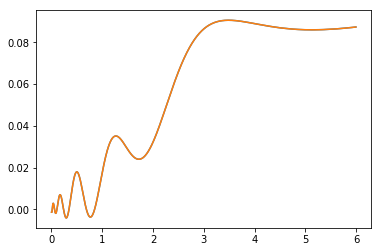

In [51]:
plt.plot(Frequencies, u1)
plt.plot(Frequencies, u2)
#plt.plot(Frequencies,mockrho)

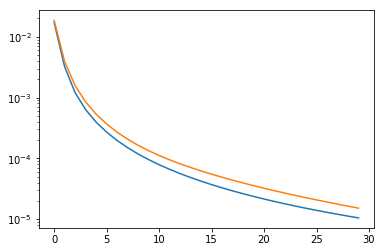

In [57]:
plt.yscale('log')

plt.plot(DataIdeal)
#plt.plot(np.dot(Kernel,u))
plt.plot(np.dot(Kernel,u1))
#plt.plot(np.dot(Kernel,testrho))

In [54]:
for i in range(len(y1)): print(y2[i]/y1[i])

1.000000133689073946537192325399524219179398020243468676358243725482186609947179934060282213243967023
1.000000203460879484586581715449930164774635468756921881727508711264471072547526311419215970484372159
1.00000025833288973316879954163006039708781395423005288210644388213790438723570862225110891522691874
1.000000305851360005845678987986502544192618339552614836172987248023748724677833464204488737434096559
1.000000625912152360333184789671616883792809382804226028969226602526713799478685932668942731857189205
0.9999990731098745515523440956027412833627126842954562693472662256791673133569734427635398063230165418
0.9999885710068140051219762844010467710482528284028468692079028900283623684904994414566170675205435967
1.000003990710336227723436508133544139883093952845003852006676567779470265663589274442810557334128977
0.9999963781660087800016603083946529617990979291085182219683629736553956943170298415710103137324384007
1.000006904289792320313008792753759324923029053482107275035112062882318291987615